In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df=pd.read_csv('/content/Data Analyst - Test Data - US.csv')

In [ ]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [ ]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [ ]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [ ]:
# preprocessing
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace("\n","")
df['Review'] = df['Review'].str.replace("Read more","")
df['Review'] = df['Review'].str.replace("Read less","")
import re
df['Review'] = df['Review'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [ ]:
df.Review.head()

0    i was very impressed with the resort great sta...
1    the rooms were nice the outside needs work als...
2    great location i have stayed at this hotel on ...
3    the hotel was adequate for my stay the strips ...
4    great location room was large and spacious par...
Name: Review, dtype: object

In [ ]:
df = df.iloc[:,0:1]
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['Review'].apply(lambda x: sentiment(x))

In [ ]:
df

,Review,sentiment
0,i was very impressed with the resort great sta...,positive
1,the rooms were nice the outside needs work als...,positive
2,great location i have stayed at this hotel on ...,positive
3,the hotel was adequate for my stay the strips ...,positive
4,great location room was large and spacious par...,positive
...,...,...
6443,the staff were all so friendly frank the chef ...,positive
6444,the internet barely worked or didnt work,neutral
6445,the location was great the bed was the mos...,positive
6446,we were early for check in and the staff was v...,neutral


In [ ]:
df.describe()

,Review,sentiment
count,6448,6448
unique,6374,3
top,nan,positive
freq,55,4372


<Axes: xlabel='sentiment', ylabel='count'>

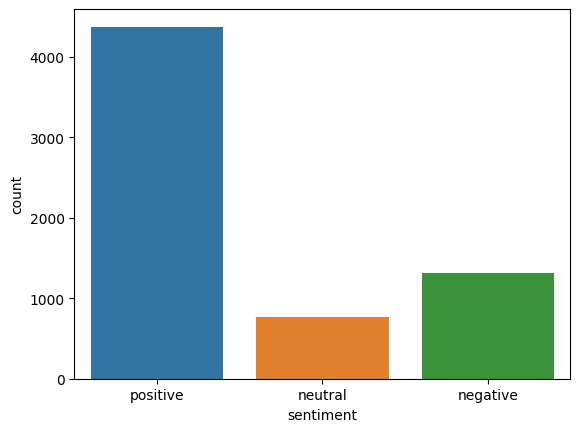

In [ ]:
sns.countplot(x='sentiment',data=df)

In [ ]:
def pos_tagging(data):
    req_tag = ['NN']
    extracted_words = []
    i = 0
    try:
        for x in data['Review']:
            doc = nlp(x)
            for token in doc:
                i += 1
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    extracted_words.append(token.lemma_)
        return extracted_words
    except Exception as e:
        return extracted_words
extracted_words = pos_tagging(df)
ser = pd.Series(extracted_words).value_counts().head(10)
index = ser.index
value = ser.values
index

Index(['room', 'hotel', 'staff', 'location', 'service', 'time', 'night',
       'parking', 'stay', 'desk'],
      dtype='object')

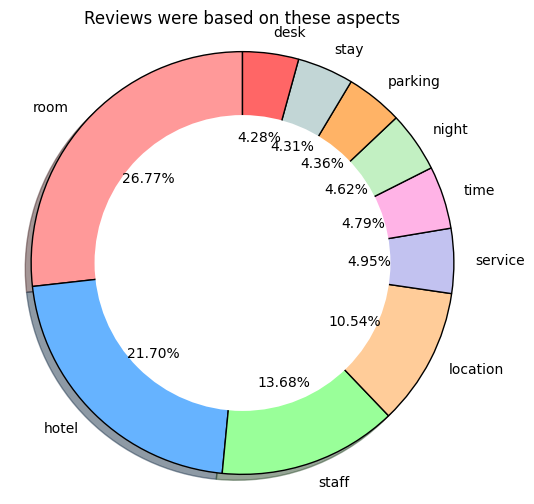

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
# freq = index
# val = value
# ax.pie(val, labels = freq,autopct='%1.2f%%')
# plt.show()



freq = index
val = value
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#c2d6d6', '#ff6666']


# explode = (0.1, 0, 0, 0)
fig, ax = plt.subplots(figsize=(6, 6))
wedgeprops = dict(width=0.4, edgecolor='black')

ax.pie(val, labels=freq, autopct='%1.2f%%', startangle=90,colors=colors, shadow=True, wedgeprops=wedgeprops)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')

plt.title("Reviews were based on these aspects")
plt.show()


In [ ]:
aspect = []
description = []

for sentence in df['Review']:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspect.append(target)
    description.append(descriptive_term)
df['aspect'] = aspect
df['description'] = description

In [ ]:
df['aspect'] = df['aspect'].str.replace('beds','bed')
df['aspect'] = df['aspect'].str.replace('rooms','room')
df['aspect'].value_counts()

             1168
room          574
staff         399
hotel         383
location      270
             ... 
ghetto          1
blankets        1
looking         1
fortement       1
lighting        1
Name: aspect, Length: 1213, dtype: int64

In [ ]:
df.head()

,Review,sentiment,aspect,description
0,i was very impressed with the resort great sta...,positive,location,very reasonable
1,the rooms were nice the outside needs work als...,positive,room,nice
2,great location i have stayed at this hotel on ...,positive,location,last
3,the hotel was adequate for my stay the strips ...,positive,breakfast,andor
4,great location room was large and spacious par...,positive,staff,friendly


In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# _df_1.groupby('aspect').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='aspect', ylabel='count'>

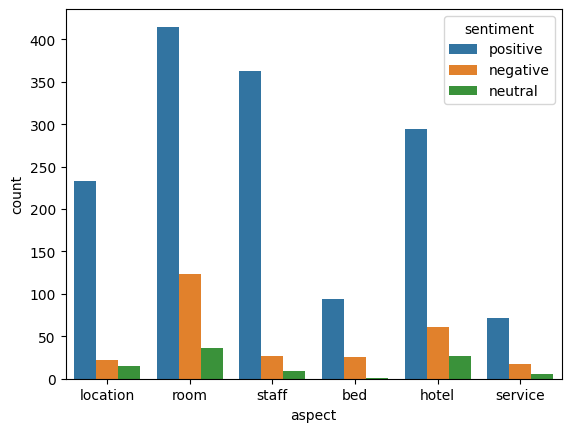

In [ ]:
new = df[(df['aspect'] == 'room') | (df['aspect'] == 'staff') | (df['aspect'] == 'hotel') |(df['aspect'] == 'location') | (df['aspect'] == 'bed') |(df['aspect'] == 'service')][['sentiment','aspect']]
sns.countplot(x='aspect',data=new, hue='sentiment')

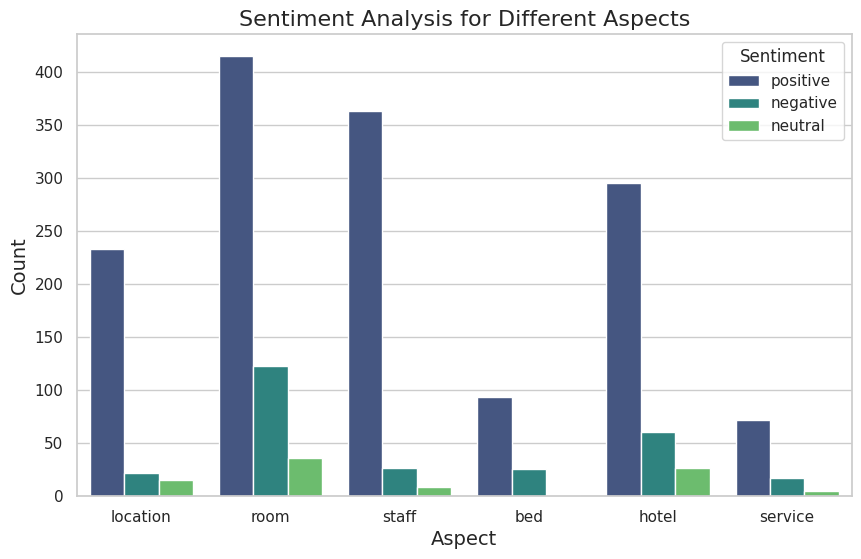

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter aspects
new = df[(df['aspect'] == 'room') | (df['aspect'] == 'staff') | (df['aspect'] == 'hotel') |(df['aspect'] == 'location') | (df['aspect'] == 'bed') |(df['aspect'] == 'service')][['sentiment','aspect']]

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(x='aspect', hue='sentiment', data=new, palette="viridis")

# Adding title and labels
plt.title("Sentiment Analysis for Different Aspects", fontsize=16)
plt.xlabel('Aspect', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show legend
plt.legend(title='Sentiment', loc='upper right')

# Show the plot
plt.show()


In [ ]:
df

,Review,sentiment,aspect,description
0,i was very impressed with the resort great sta...,positive,location,very reasonable
1,the rooms were nice the outside needs work als...,positive,room,nice
2,great location i have stayed at this hotel on ...,positive,location,last
3,the hotel was adequate for my stay the strips ...,positive,breakfast,andor
4,great location room was large and spacious par...,positive,staff,friendly
...,...,...,...,...
6443,the staff were all so friendly frank the chef ...,positive,pool,unable
6444,the internet barely worked or didnt work,neutral,internet,
6445,the location was great the bed was the mos...,positive,bed,most uncomfortable
6446,we were early for check in and the staff was v...,neutral,staff,several


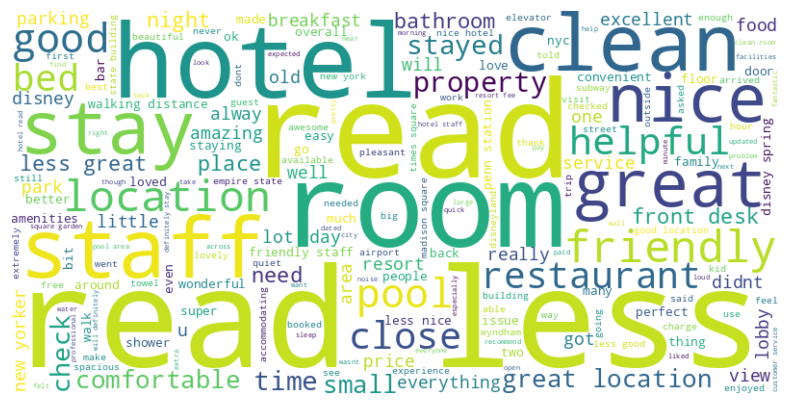

In [ ]:
from wordcloud import WordCloud

# Example for positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['Review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


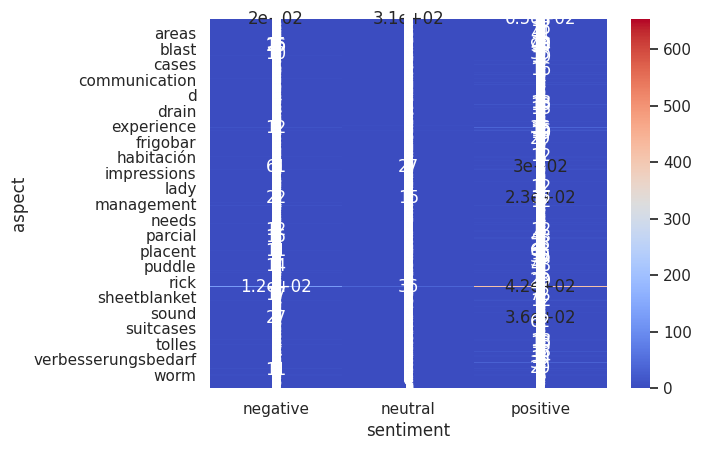

In [ ]:
aspect_sentiments = df.explode('aspect').groupby('aspect')['sentiment'].value_counts().unstack().fillna(0)
sns.heatmap(aspect_sentiments, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
 df_2=pd.read_csv('/content/Data Analyst - Test Data - US.csv')

In [ ]:
df_3=df_2.iloc[:,1:2]

In [ ]:
df_4 = pd.concat([df, df_3], axis=1)


In [ ]:
df_4.head()

,Review,sentiment,aspect,description,date
0,i was very impressed with the resort great sta...,positive,location,very reasonable,2019/08/20
1,the rooms were nice the outside needs work als...,positive,room,nice,2019/08/20
2,great location i have stayed at this hotel on ...,positive,location,last,2019/08/20
3,the hotel was adequate for my stay the strips ...,positive,breakfast,andor,2019/08/20
4,great location room was large and spacious par...,positive,staff,friendly,2019/08/19


<Figure size 600x600 with 0 Axes>

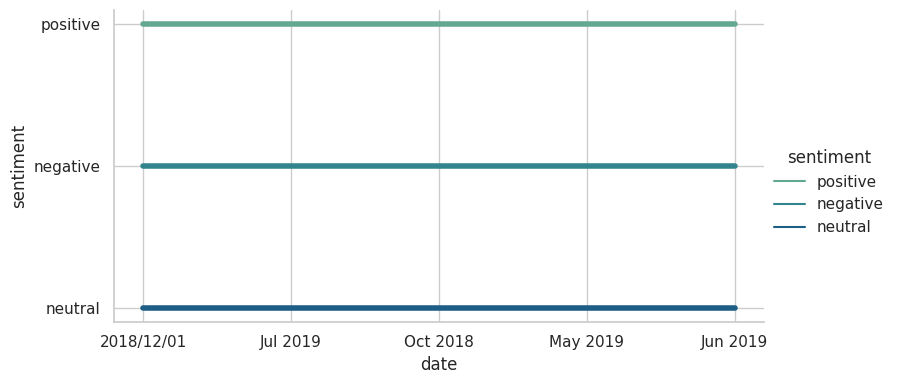

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_dates = df_4['date'].value_counts().head(5).index
df_top_dates = df_4[df_4['date'].isin(top_dates)]

# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the lineplot with 'date' on the x-axis and 'sentiment' on the y-axis
sns.relplot(x='date', y='sentiment', data=df_top_dates, hue='sentiment', kind='line', palette='crest', linewidth=4, zorder=5, height=4, aspect=2)
plt.show()

In [ ]:
df_5=df_2.iloc[:,2:3]

In [ ]:
df_5.head()

,Location
0,Sebastian
1,Los Angeles
2,Georgia
3,NaN
4,Palm Harbor


In [ ]:
df_6 = pd.concat([df, df_5], axis=1)


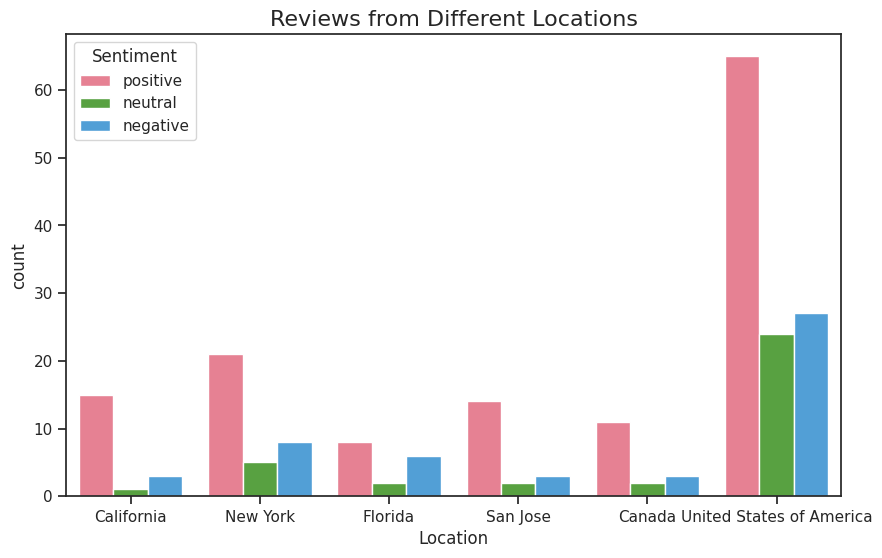

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
top_loc = df_6['Location'].value_counts().head(6).index

# Filter the DataFrame for only the top dates
df_top_loc = df_6[df_6['Location'].isin(top_loc)]
sns.countplot(x='Location', hue='sentiment', data=df_top_loc, palette="husl")

# Adding title and labels
plt.title("Reviews from Different Locations", fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('count', fontsize=12)

# Show legend
plt.legend(title='Sentiment', loc='upper left')

# Show the plot
plt.show()


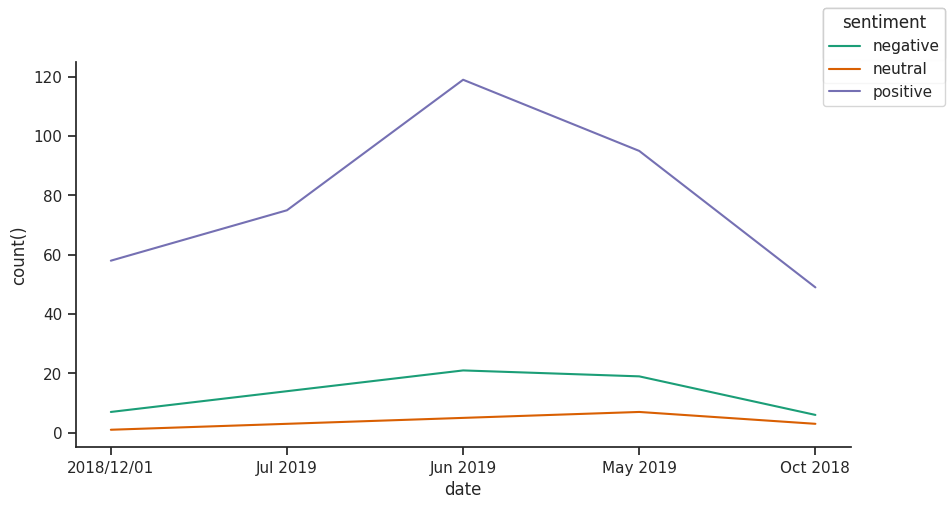

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5))
df_sorted = df_top_dates.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', loc='upper right')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# top_aspect = df_4['aspect'].value_counts().head(15).index
# df_top_aspects = df_4[df_4['aspect'].isin(top_aspect)]
# def _plot_series(series, series_name, series_index=0):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   palette = list(sns.palettes.mpl_palette('Dark2'))
#   counted = (series['date']
#                 .value_counts()
#               .reset_index(name='counts')
#               .rename({'index': 'date'}, axis=1)
#               .sort_values('date', ascending=True))
#   xs = counted['date']
#   ys = counted['counts']
#   plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# fig, ax = plt.subplots(figsize=(10, 5))
# df_sorted = df_top_aspects.sort_values('date', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('aspect')):
#   _plot_series(series, series_name, i)
#   fig.legend(title='aspects', loc='upper right')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('date')
# _ = plt.ylabel('count()')

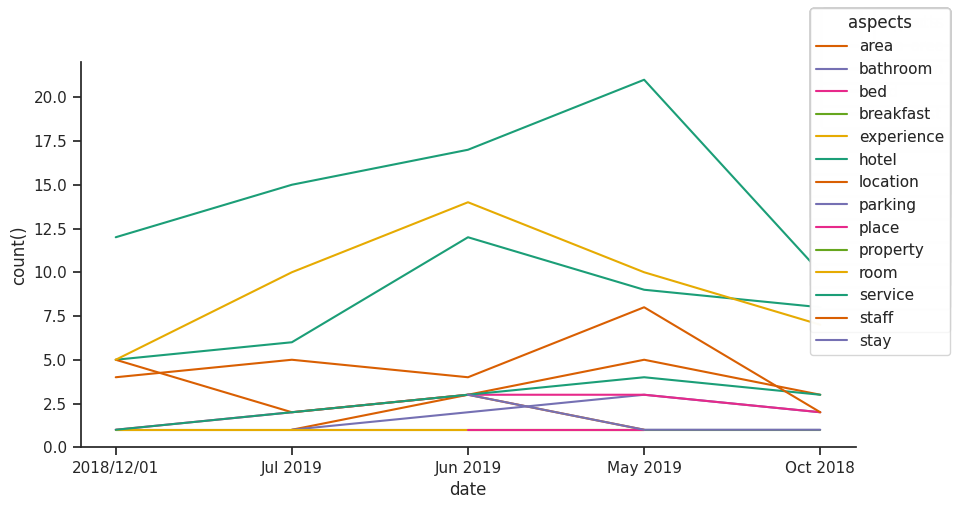

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
top_aspect = df_4['aspect'].value_counts().head(15).index
df_top_aspects = df_4[df_4['aspect'].isin(top_aspect) & df_4['date'].isin(top_dates)]

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5))
df_sorted = df_top_aspects.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('aspect')):
  _plot_series(series, series_name, i)
  fig.legend(title='aspects', loc='upper right')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# top_aspect = df_4['aspect'].value_counts().head(15).index
# df_top_aspects = df_4[df_4['aspect'].isin(top_aspect) |  df_4['date'].isin(top_dates)]
# top_dates = df_4['date'].value_counts().head(5).index
# df_top_dates = df_4[df_4['date'].isin(top_dates)]
# def _plot_series(series, series_name, series_index=0):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   palette = list(sns.palettes.mpl_palette('Dark2'))
#   counted = (series['date']
#                 .value_counts()
#               .reset_index(name='counts')
#               .rename({'index': 'date'}, axis=1)
#               .sort_values('date', ascending=True))
#   xs = counted['date']
#   ys = counted['counts']
#   plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# fig, ax = plt.subplots(figsize=(10, 5))
# df_sorted = df_top_aspects.sort_values('date', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('aspect')):
#   _plot_series(series, series_name, i)
#   fig.legend(title='aspects', loc='upper right')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('date')
# _ = plt.ylabel('count()')

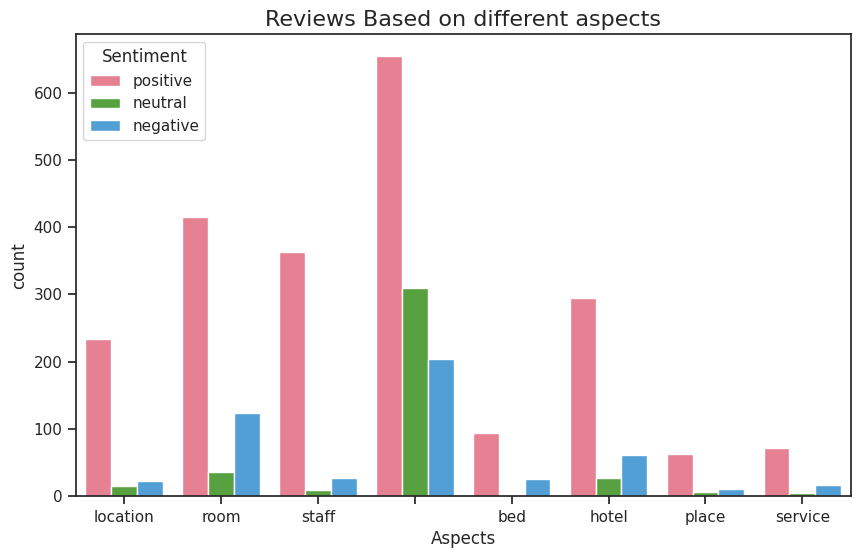

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
top_aspect = df_4['aspect'].value_counts().head(8).index
df_top_aspects = df_4[df_4['aspect'].isin(top_aspect)]
sns.countplot(x='aspect', hue='sentiment', data=df_top_aspects, palette="husl")

# Adding title and labels
plt.title("Reviews Based on different aspects", fontsize=16)
plt.xlabel('Aspects', fontsize=12)
plt.ylabel('count', fontsize=12)

# Show legend
plt.legend(title='Sentiment', loc='upper left')

# Show the plot
plt.show()


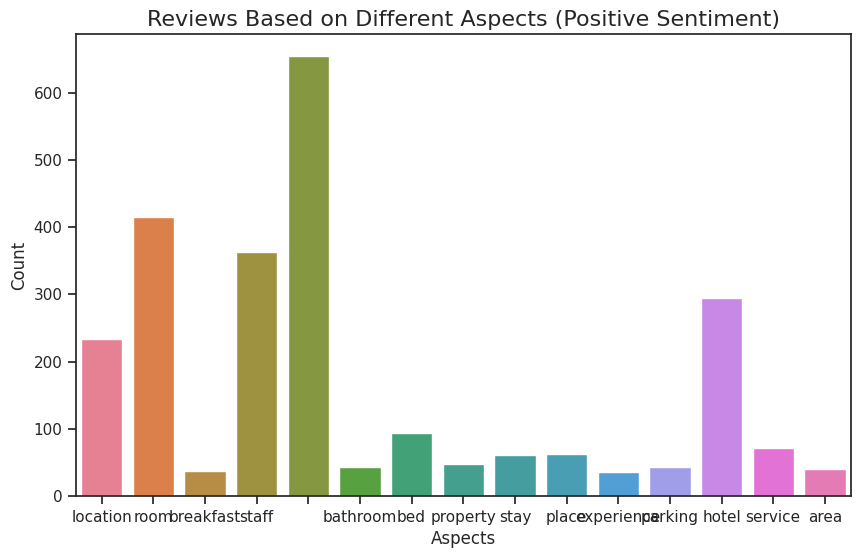

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="ticks")

# Get the top 8 aspects based on count
top_aspect = df_4['aspect'].value_counts().head(15).index

# Filter the DataFrame for the top aspects
df_top_aspects = df_4[df_4['aspect'].isin(top_aspect)]

# Filter the DataFrame for positive sentiment
df_positive_sentiment = df_top_aspects[df_top_aspects['sentiment'] == 'positive']

# Create count plot for positive sentiment
sns.countplot(x='aspect', data=df_positive_sentiment, palette="husl")

# Adding title and labels
plt.title("Reviews Based on Different Aspects (Positive Sentiment)", fontsize=16)
plt.xlabel('Aspects', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


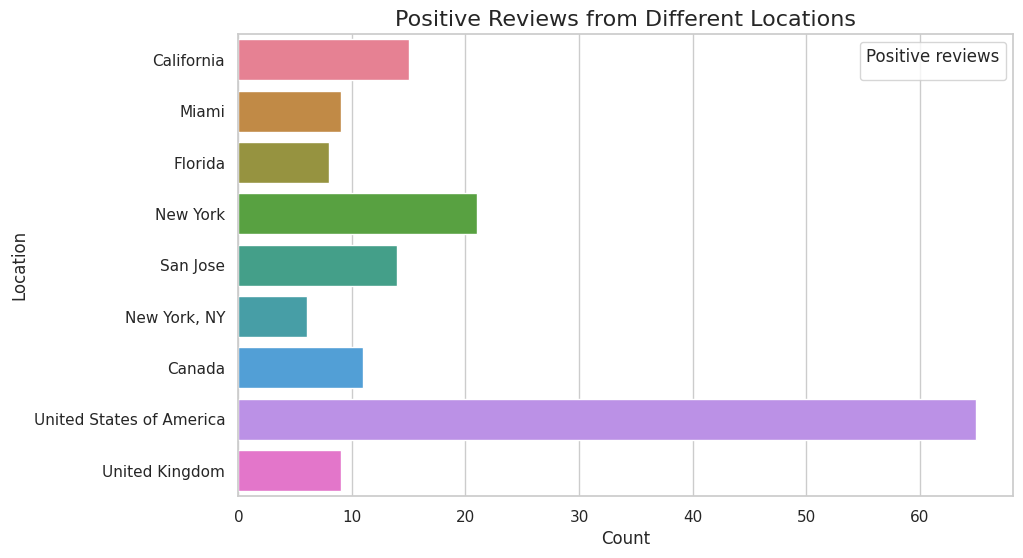

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
top_loc = df_6['Location'].value_counts().head(9).index

df_top_loc = df_6[df_6['Location'].isin(top_loc)]

df_positive_sentiment_loc = df_top_loc[df_top_loc['sentiment'] == 'positive']

sns.countplot(y='Location', data=df_positive_sentiment_loc, palette="husl")

plt.title("Positive Reviews from Different Locations", fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)

plt.legend(title='Positive reviews', loc='upper right')


plt.show()


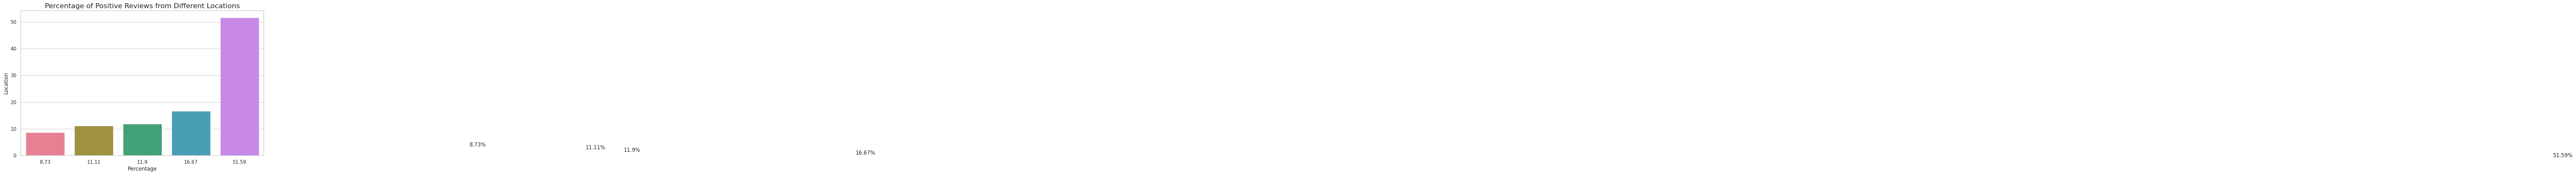

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Get the top 9 locations based on count
top_loc = df_6['Location'].value_counts().head(5).index

# Filter the DataFrame for the top locations
df_top_loc = df_6[df_6['Location'].isin(top_loc)]

# Calculate the percentage of positive reviews for each location
positive_percentage = (
    df_top_loc[df_top_loc['sentiment'] == 'positive']['Location']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

# Create count plot for positive sentiment by location
sns.barplot(x='Location', y='Location', data=positive_percentage, palette="husl")

# Display percentage values on the plot
for index, value in enumerate(positive_percentage['Location']):
    plt.text(value, index, f'{value}%', va='center')

# Adding title and labels
plt.title("Percentage of Positive Reviews from Different Locations", fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
top_loc = df_6['Location'].value_counts().head(9).index

df_top_loc = df_6[df_6['Location'].isin(top_loc)]

df_positive_sentiment_loc = df_top_loc[df_top_loc['sentiment'] == 'positive']

sns.countplot(y='Location', data=df_positive_sentiment_loc, palette="husl")

plt.title("Positive Reviews from Different Locations", fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)

plt.legend(title='Positive reviews', loc='upper right')


plt.show()


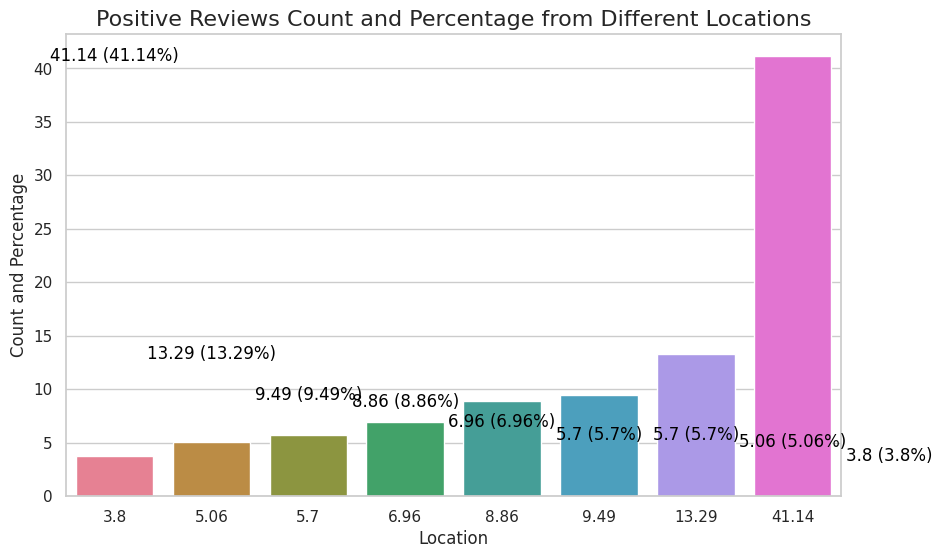

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Get the top 9 locations based on count
top_loc = df_6['Location'].value_counts().head(9).index

# Filter the DataFrame for the top locations
df_top_loc = df_6[df_6['Location'].isin(top_loc)]

# Calculate the count and percentage of positive reviews for each location
positive_data = (
    df_top_loc[df_top_loc['sentiment'] == 'positive']['Location']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

# Create horizontal bar plot for positive sentiment by location
ax = sns.barplot(x=positive_data['Location'], y=positive_data['Location'], palette="husl")

# Display count and percentage values on the plot
for index, (count, percent) in enumerate(zip(positive_data['Location'], positive_data['Location'])):
    plt.text(index, count, f'{count} ({percent}%)', ha='center', va='center', color='black')

# Adding title and labels
plt.title("Positive Reviews Count and Percentage from Different Locations", fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count and Percentage', fontsize=12)

# Show the plot
plt.show()
